<a href="https://colab.research.google.com/github/telvinmj/EDA/blob/main/Eda_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **21BCE3558**

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/insurance.csv')

In [145]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [146]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1337.000000,1338.000000,1338.000000
mean,39.207025,30.658657,1.094918,13270.422265
std,14.049960,6.098003,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [147]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [149]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1337.000000,1338.000000,1338.000000
mean,39.207025,30.658657,1.094918,13270.422265
std,14.049960,6.098003,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [150]:
# 1. Dimension
print("Shape of the dataset:", df.shape)

# 2. Summary Statistics
print("Summary Statistics:")
print(df.describe(include='all'))


Shape of the dataset: (1338, 7)
Summary Statistics:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1337.000000  1338.000000   1337       1337   
unique          NaN     3          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   675          NaN          NaN   1063        364   
mean      39.207025   NaN    30.658657     1.094918    NaN        NaN   
std       14.049960   NaN     6.098003     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.290000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.675000     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
to

In [151]:
# 3. Checking for missing values
print("Missing Values:\n", df.isnull().sum())

# 4. Handling missing values (Dropping rows with missing values)
df_clean = df.dropna()

# 5. Verifying missing values are handled
print("Missing Values after cleaning:\n", df_clean.isnull().sum())


Missing Values:
 age         0
sex         0
bmi         1
children    0
smoker      1
region      1
charges     0
dtype: int64
Missing Values after cleaning:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [152]:
# 6. Removing duplicates
df_clean = df_clean.drop_duplicates()

# 7. Converting categorical columns to appropriate types if needed
df_clean['sex'] = df_clean['sex'].astype('category')
df_clean['smoker'] = df_clean['smoker'].astype('category')
df_clean['region'] = df_clean['region'].astype('category')

# 8. Confirming data types
print("Data Types after cleaning:")
print(df_clean.dtypes)


Data Types after cleaning:
age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


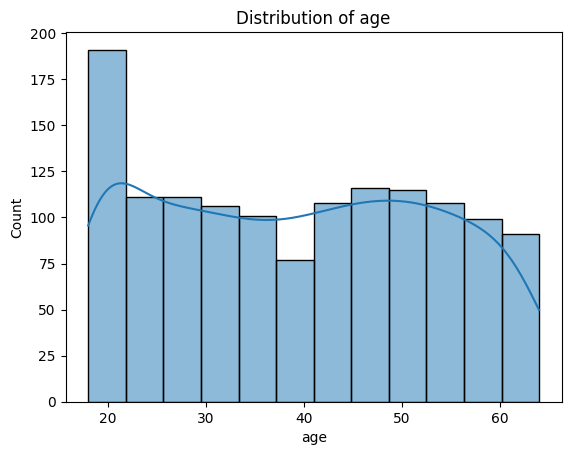

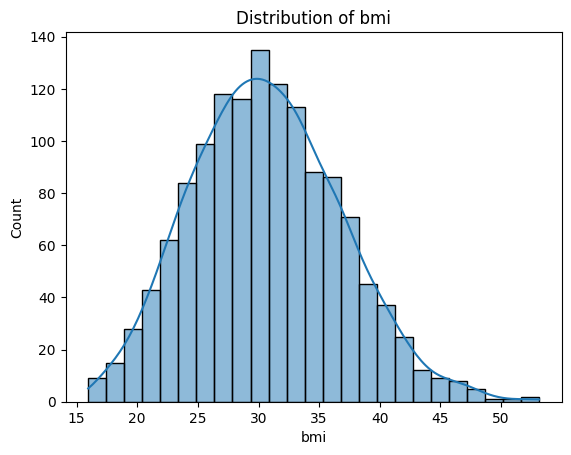

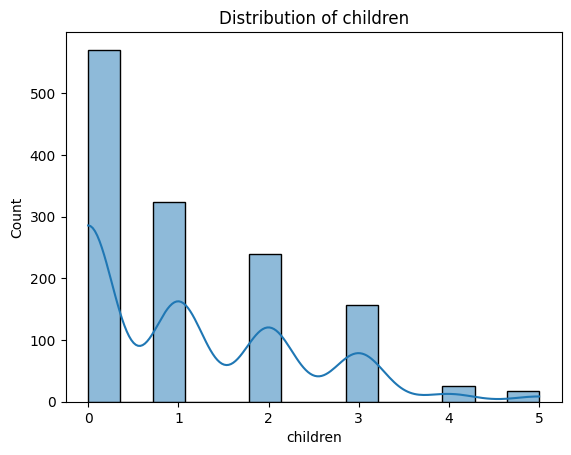

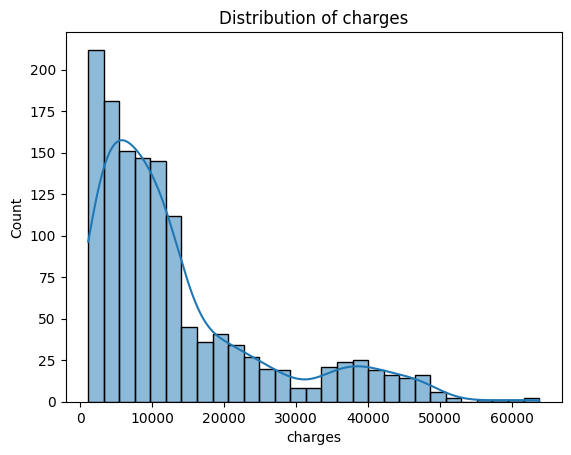

In [153]:
# 9. Distribution plots for numerical variables
numerical_cols = ['age', 'bmi', 'children', 'charges']
for col in numerical_cols:
    plt.figure()
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


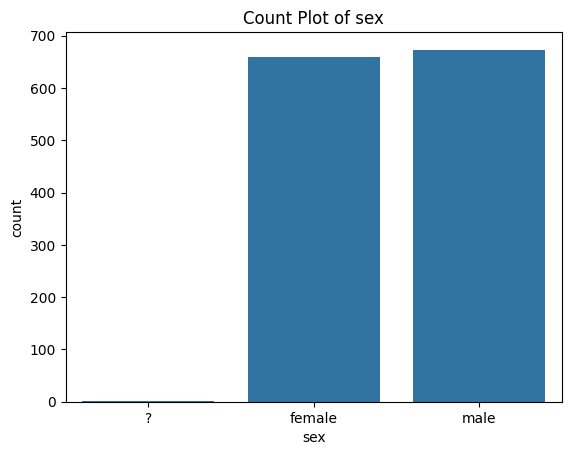

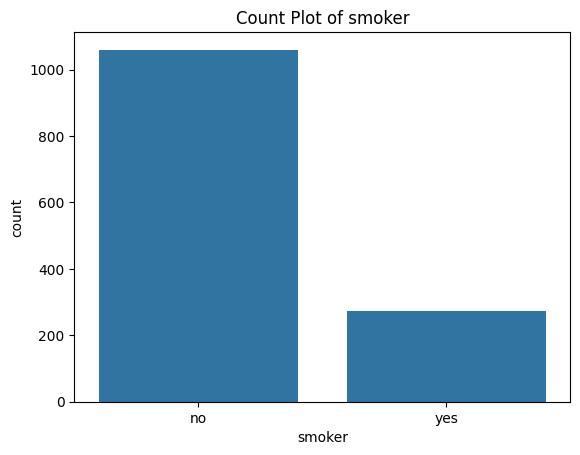

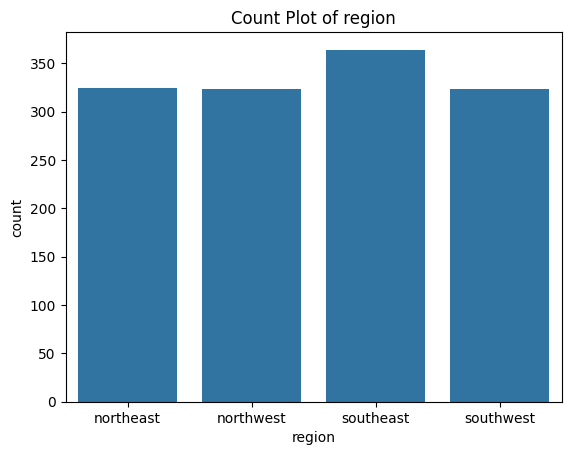

In [154]:
# 10. Count plots for categorical variables
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=df_clean[col])
    plt.title(f'Count Plot of {col}')
    plt.show()


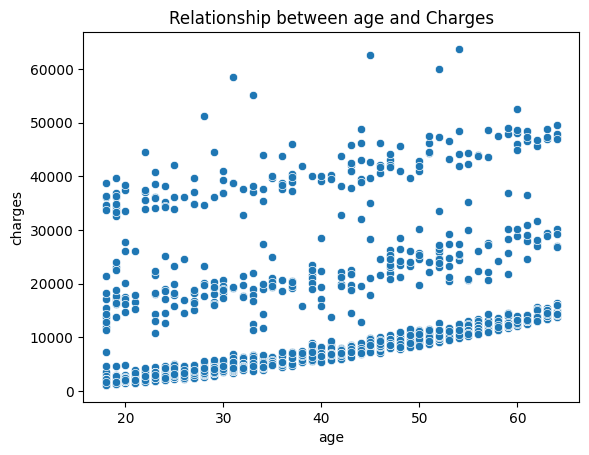

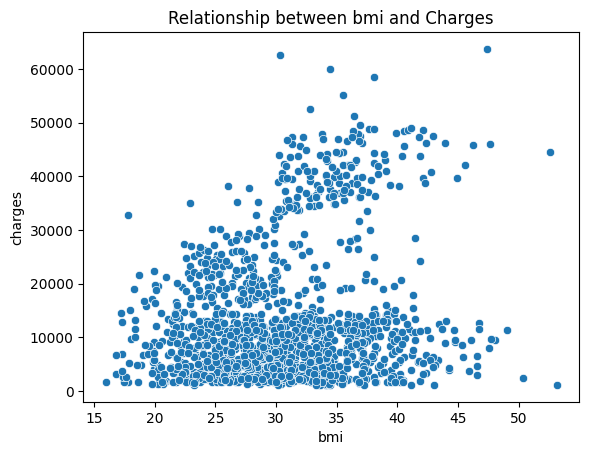

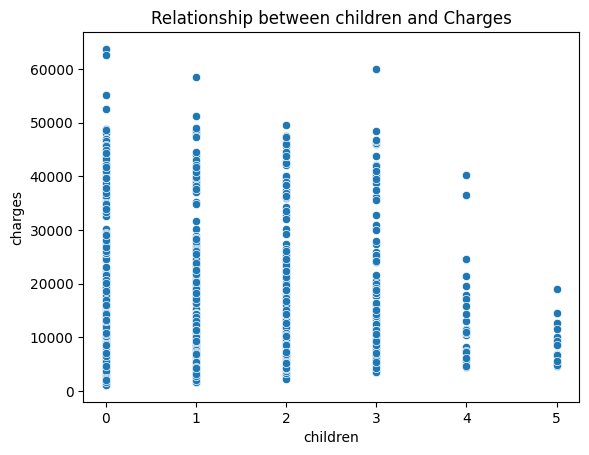

In [155]:
# 11. Scatter plots for numerical variables against charges
for col in numerical_cols:
    if col != 'charges':
        plt.figure()
        sns.scatterplot(x=df_clean[col], y=df_clean['charges'])
        plt.title(f'Relationship between {col} and Charges')
        plt.show()


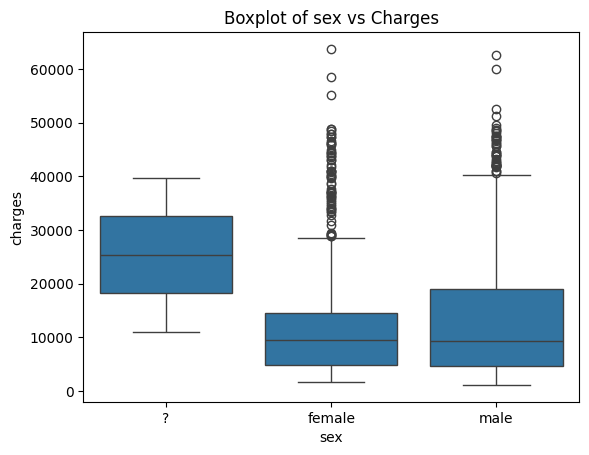

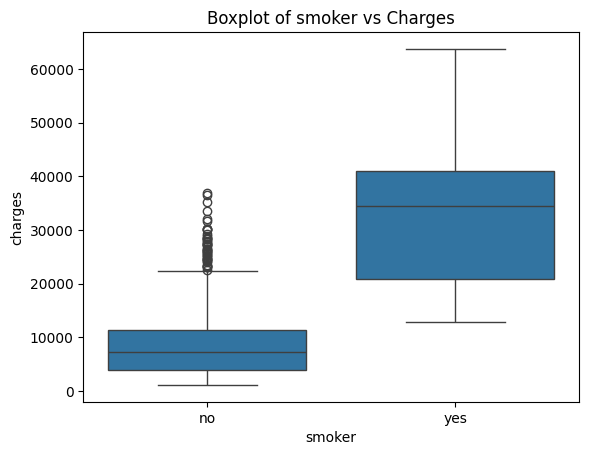

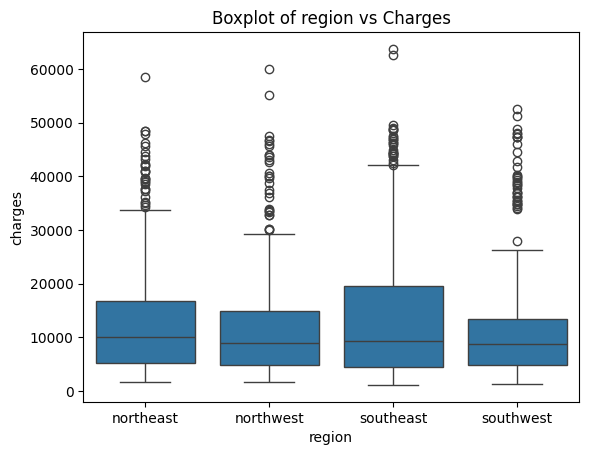

In [156]:
# 12. Boxplot for categorical vs numerical (charges)
for col in categorical_cols:
    plt.figure()
    sns.boxplot(x=df_clean[col], y=df_clean['charges'])
    plt.title(f'Boxplot of {col} vs Charges')
    plt.show()


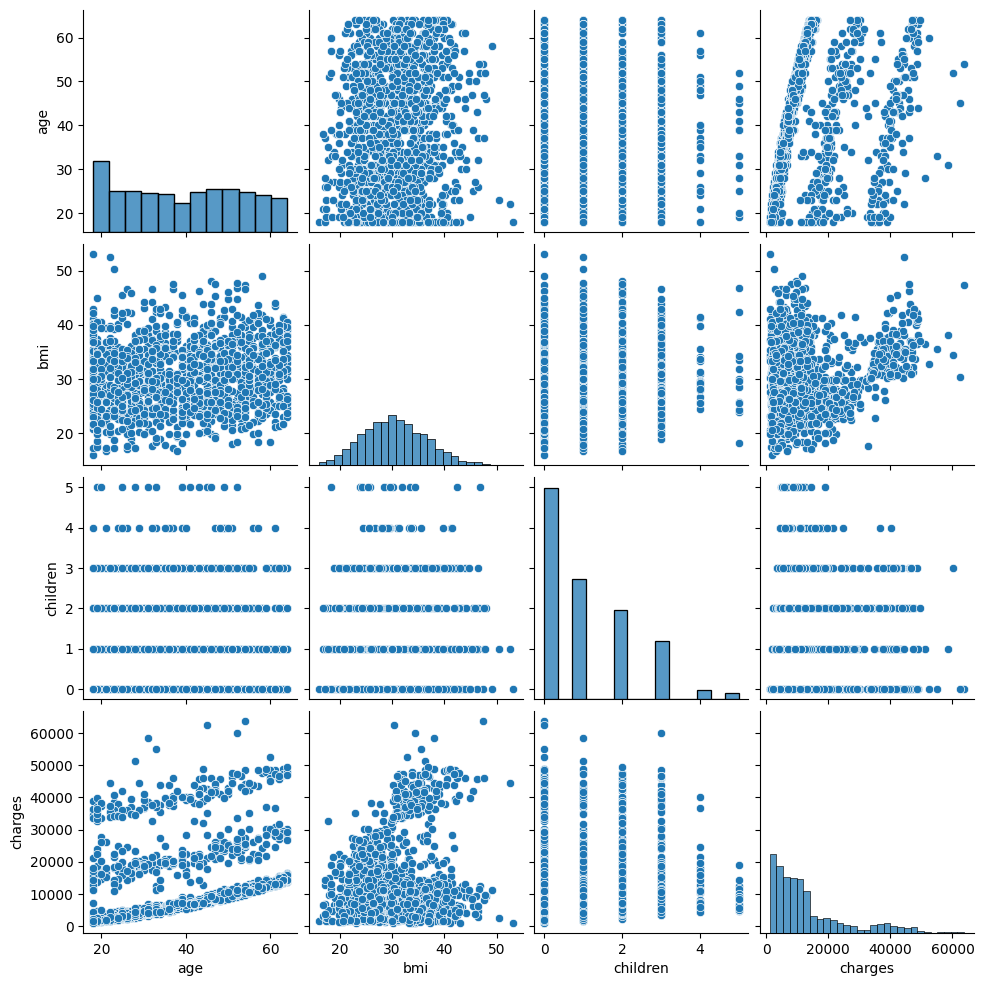

In [157]:
# 13. Pairplot for numerical features
sns.pairplot(df_clean[numerical_cols])
plt.show()


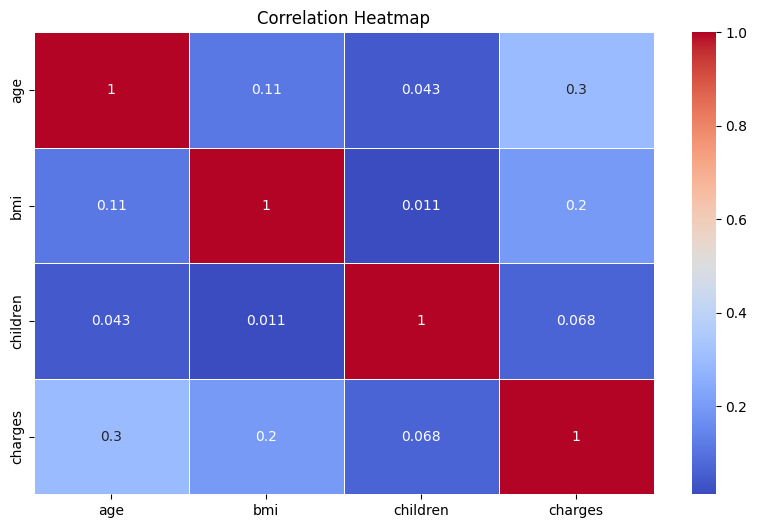

In [158]:
# 14. Heatmap for correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


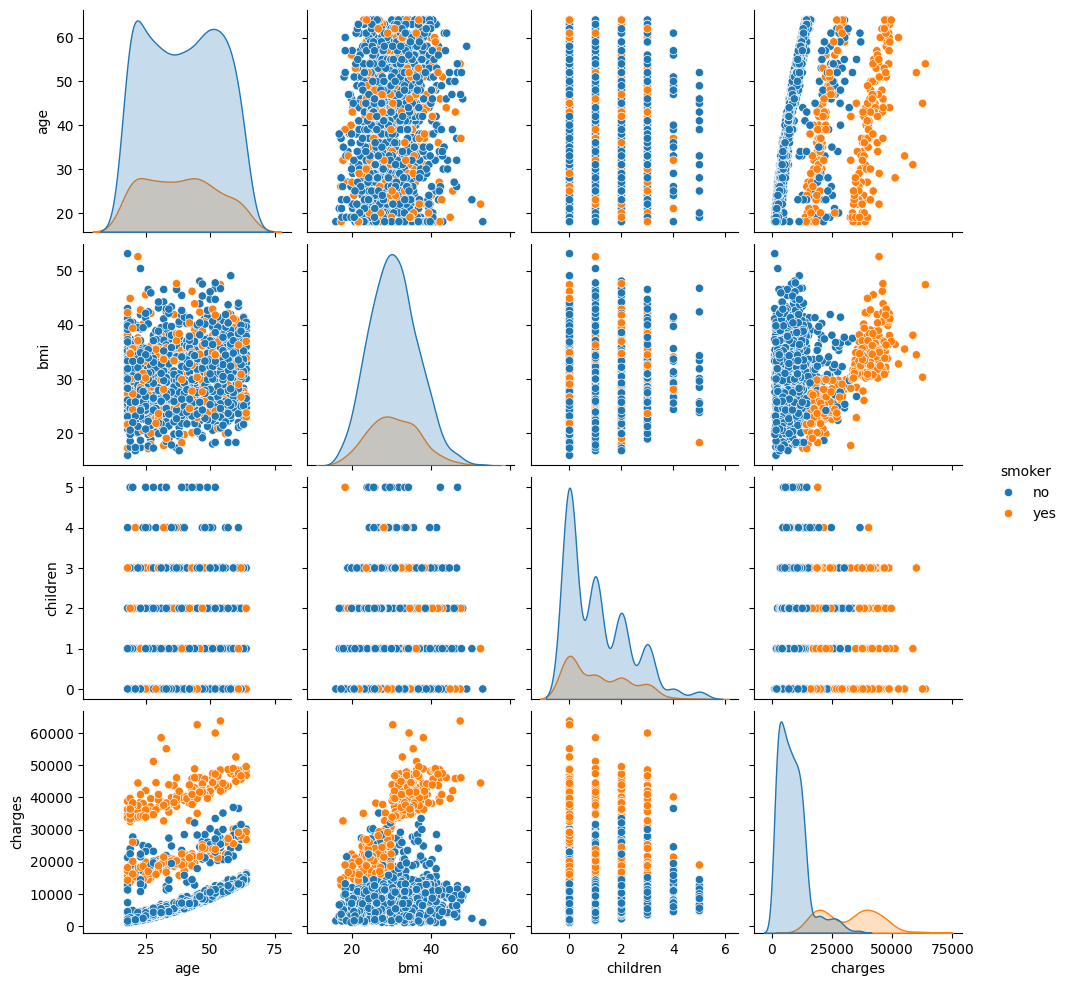

In [159]:
# 15. Pairplot including hue for smoker status
sns.pairplot(df_clean, hue='smoker', vars=numerical_cols)
plt.show()

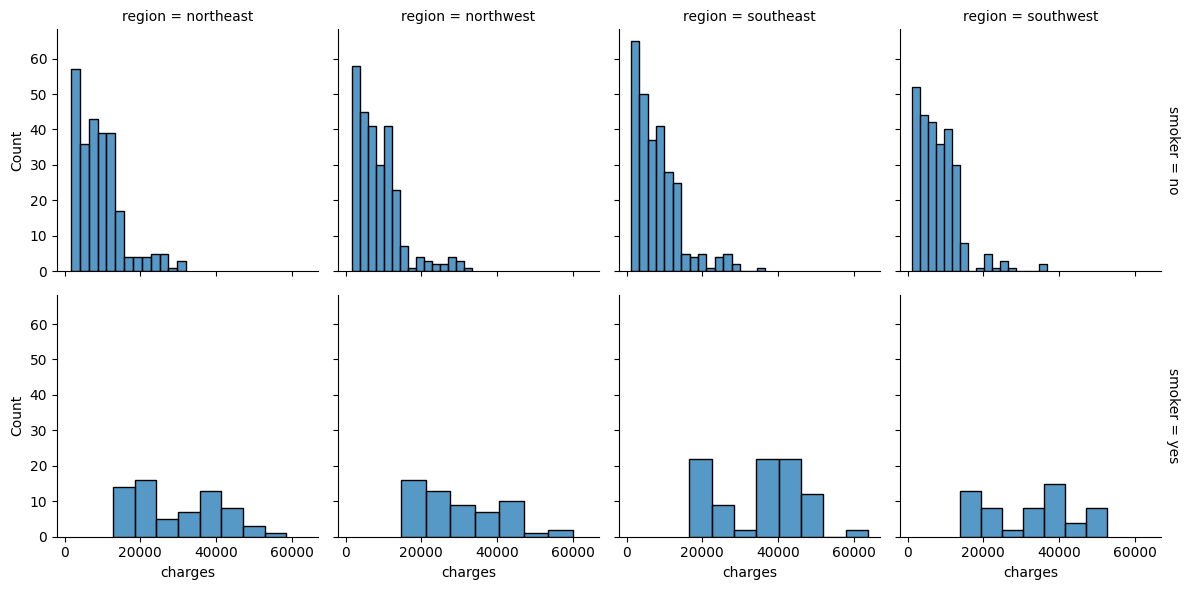

In [160]:
# 16. FacetGrid for charges by region and smoker status
g = sns.FacetGrid(df_clean, col='region', row='smoker', margin_titles=True)
g.map(sns.histplot, 'charges')
plt.show()


K

In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [162]:
# Assuming df_clean is already loaded as your dataset

# Selecting numerical columns for clustering
X = df_clean[['age', 'bmi', 'children', 'charges']].values

# Standardizing the data (K-means performs better on scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


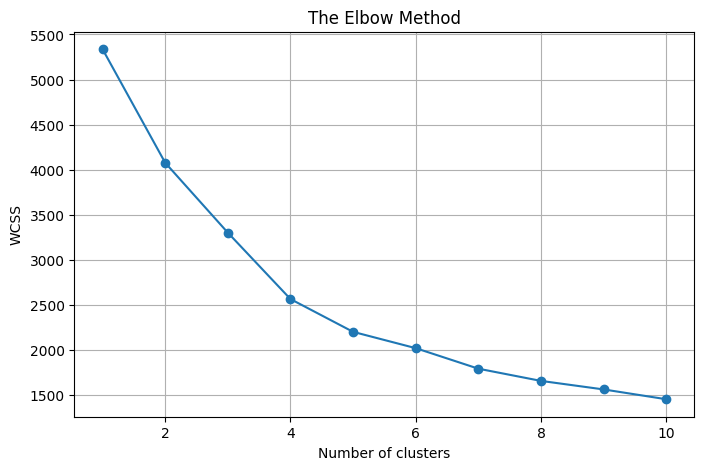

In [163]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method results
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [164]:
# Choosing the number of clusters based on the elbow plot
# Here we assume 4 clusters; you can adjust this based on the plot you see
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


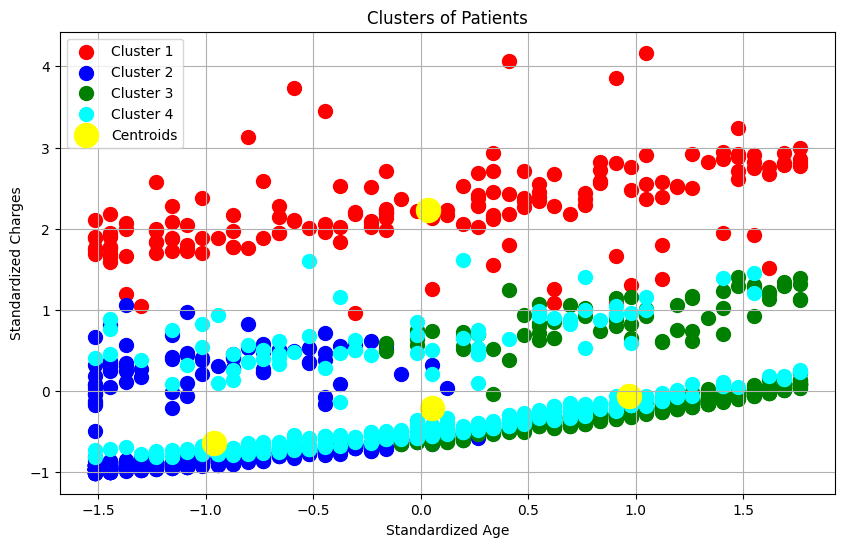

In [165]:
# Visualizing the clusters using 'age' and 'charges' for simplicity
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 3], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 3], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Patients')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Charges')
plt.legend()
plt.grid(True)
plt.show()


Hierarchical Clustering

In [166]:
import scipy.cluster.hierarchy as sch

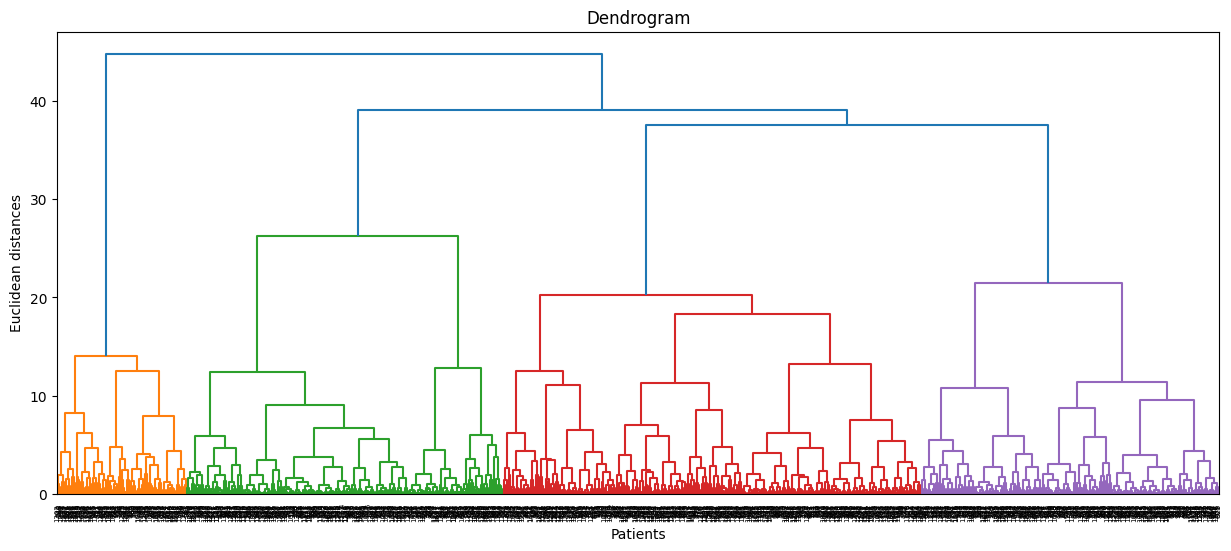

In [167]:
# Creating a dendrogram to help determine the optimal number of clusters
plt.figure(figsize=(15, 6))
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.show()


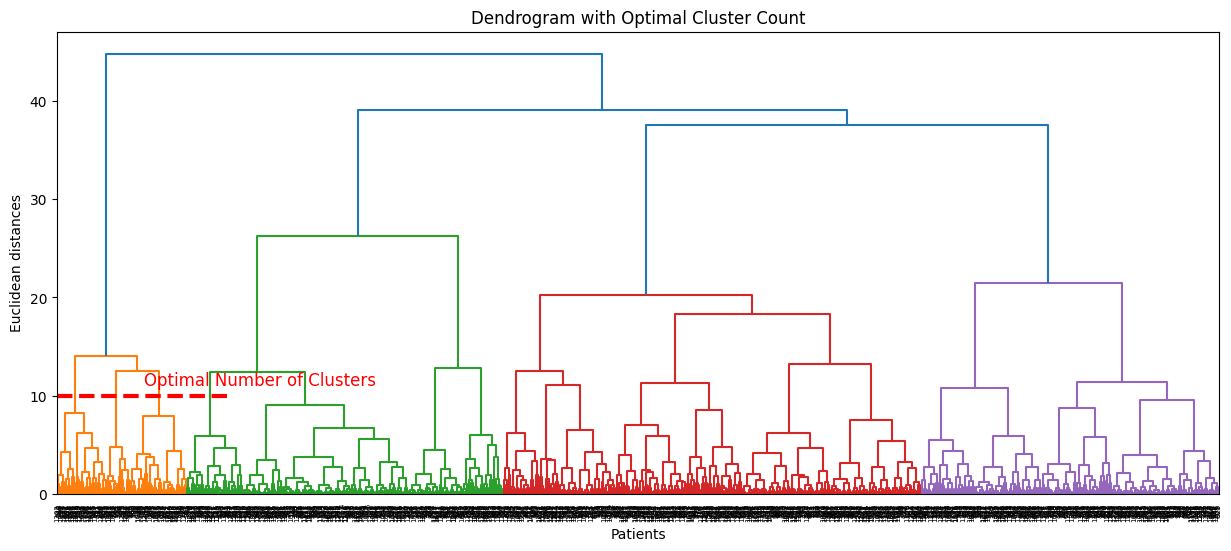

In [168]:
# Drawing a horizontal line to help identify the optimal number of clusters visually
plt.figure(figsize=(15, 6))
plt.title('Dendrogram with Optimal Cluster Count')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.hlines(y=10, xmin=0, xmax=2000, lw=3, linestyles='--', colors='red')
plt.text(x=1000, y=11, s='Optimal Number of Clusters', fontsize=12, color='red')
plt.show()


In [169]:
from sklearn.cluster import AgglomerativeClustering

# Assuming the optimal number of clusters is 4; adjust based on the dendrogram
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)


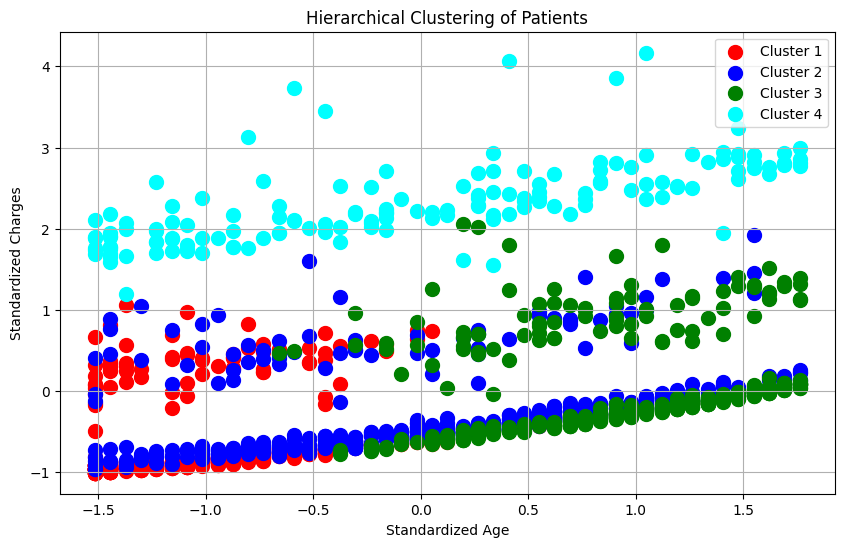

In [170]:
# Visualizing the clusters (using 'age' and 'charges' for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 3], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_hc == 3, 0], X_scaled[y_hc == 3, 3], s=100, c='cyan', label='Cluster 4')
plt.title('Hierarchical Clustering of Patients')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Charges')
plt.legend()
plt.grid(True)
plt.show()


# **Dimensionality Reduction**

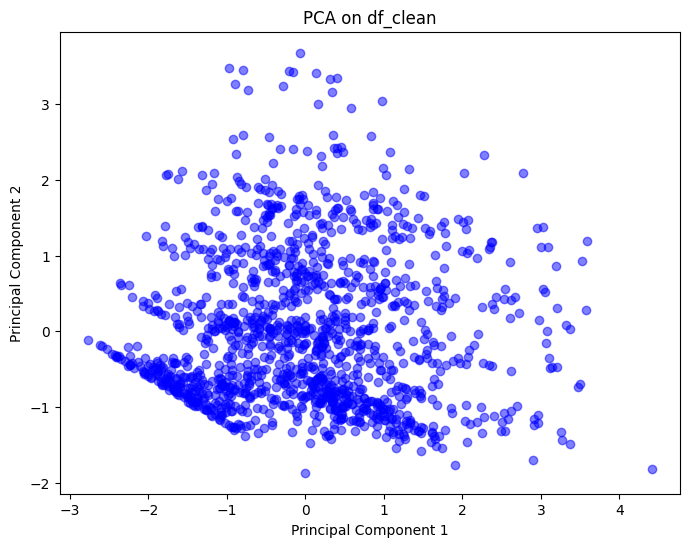

In [171]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on df_clean')
plt.show()


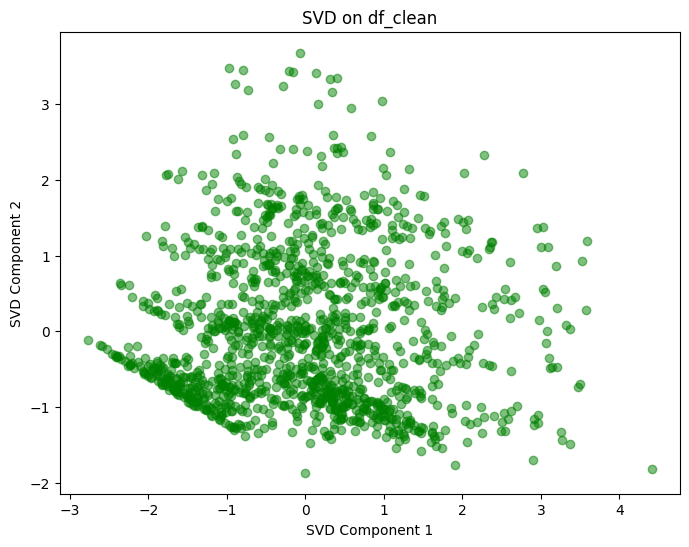

In [172]:
from sklearn.decomposition import TruncatedSVD

# Performing SVD
svd = TruncatedSVD(n_components=2)  # Choosing 2 components for simplicity
X_svd = svd.fit_transform(X_scaled)

# Plotting the SVD results
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c='green', alpha=0.5)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD on df_clean')
plt.show()


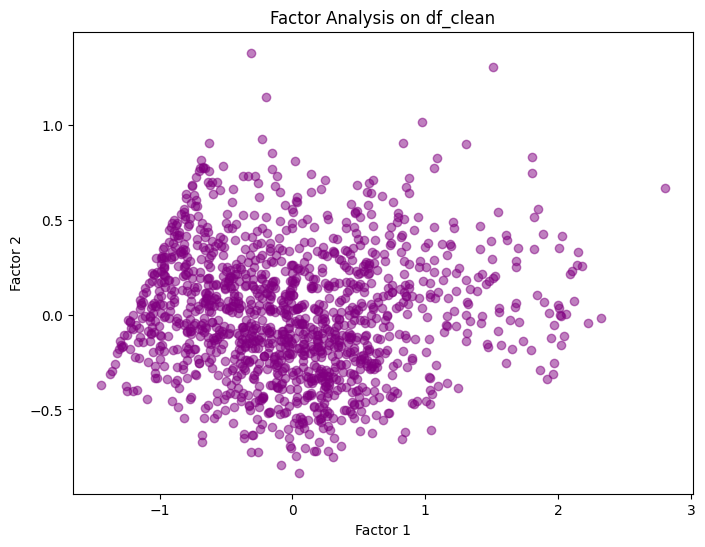

In [173]:
from sklearn.decomposition import FactorAnalysis

# Performing Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

# Plotting the Factor Analysis results
plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c='purple', alpha=0.5)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis on df_clean')
plt.show()


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# **Linear Regression Model**

In [175]:
X = df_clean.drop('charges', axis=1)
y = df_clean['charges']
X = pd.get_dummies(X, drop_first=True)


In [176]:
# Polynomial feature transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [177]:
# Training a Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [178]:
print("R^2 score on test data:", regressor.score(X_test, y_test))

R^2 score on test data: -3.138559278511858e+22


In [179]:
# Predicting the target variable for the test set
y_pred = regressor.predict(X_test)

# Creating a DataFrame to compare actual and predicted values
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(evaluate.head(10))

        Actual     Predicted
0   4661.28635   7428.011719
1   8978.18510  11427.011719
2  11436.73815  14095.011719
3  24873.38490  24699.011719
4  38511.62830  40715.011719
5   9563.02900  10512.484375
6   7196.86700   7720.484375
7  22331.56680  29967.011719
8  14418.28040  17575.011719
9   5469.00660   6851.011719


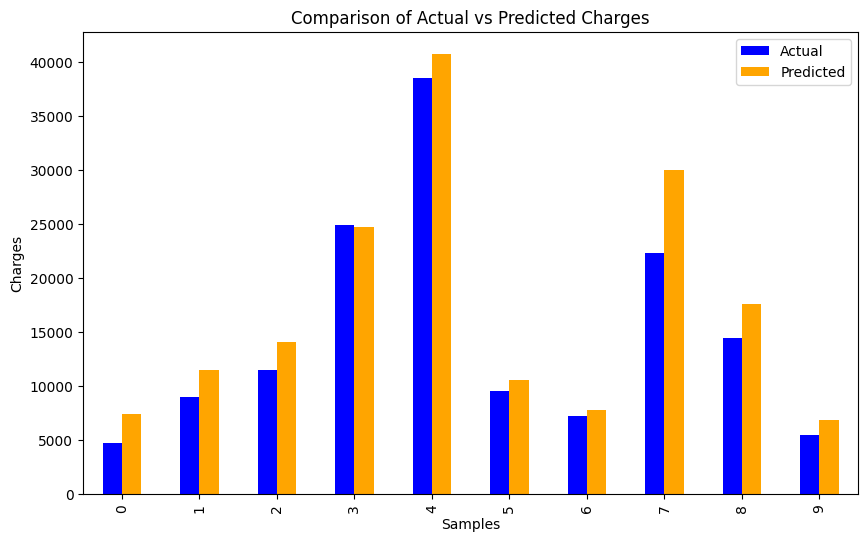

R2 score: -3.138559278511858e+22
Mean Absolute Error (MAE): 103628649922998.39
Mean Squared Error (MSE): 4.306297730793107e+30
Root Mean Squared Error (RMSE): 2075162097474100.2


In [180]:
evaluate.head(10).plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.xlabel("Samples")
plt.ylabel("Charges")
plt.title("Comparison of Actual vs Predicted Charges")
plt.show()

# 4. Computing Evaluation Metrics
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")